In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# A_sold = '97201-sold-6m.csv'
# B_sold = '97202-sold-6m.csv'

In [3]:
# A_sold = pd.read_csv(A_sold)
# B_sold = pd.read_csv(B_sold)

In [4]:
# sold_home_data = pd.merge(A_sold, B_sold, how="outer")
# sold_home_data.head(15)

In [5]:
# import glob
# import os
# os.chdir("Final-Project/Bryan/Download_Files")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [6]:
sold_home_data = 'combined_csv.csv'
sold_df = pd.read_csv(sold_home_data)
sold_df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,May-6-2020,Single Family Residential,8415 SE Schwind Cir,Vancouver,WA,98664,699999.0,1.0,1.0,...,Sold,NaN,NaN,http://www.redfin.com/WA/Vancouver/8415-SE-Sch...,RMLS,19308645.0,N,Y,45.601924,-122.590982
1,PAST SALE,NaN,Single Family Residential,5115 SE Henderson St,Portland,OR,97206,190000.0,1.0,1.0,...,NaN,NaN,NaN,http://www.redfin.com/OR/Portland/5115-SE-Hend...,NaN,NaN,N,Y,45.470002,-122.610603
2,PAST SALE,April-15-2020,Single Family Residential,7607 SE Harney St,Portland,OR,97206,229500.0,1.0,1.0,...,Sold,NaN,NaN,http://www.redfin.com/OR/Portland/7607-SE-Harn...,RMLS,19005138.0,N,Y,45.463471,-122.585376
3,PAST SALE,NaN,Single Family Residential,5404 NE Prescott St,Portland,OR,97218,185000.0,1.0,1.0,...,NaN,NaN,NaN,http://www.redfin.com/OR/Portland/5404-NE-Pres...,NaN,NaN,N,Y,45.555315,-122.607077
4,PAST SALE,NaN,Single Family Residential,2969 SW Upper Dr,Portland,OR,97201,265000.0,1.0,1.0,...,NaN,NaN,NaN,http://www.redfin.com/OR/Portland/2969-SW-Uppe...,NaN,NaN,N,Y,45.506454,-122.708514


In [7]:
#Getting rid of columns that are not needed so data are more easily viewed. 
del sold_df['SALE TYPE']
del sold_df['PROPERTY TYPE']
del sold_df['STATE OR PROVINCE']
del sold_df['STATUS']
del sold_df['SOURCE']
del sold_df['NEXT OPEN HOUSE START TIME']
del sold_df['NEXT OPEN HOUSE END TIME']
del sold_df['FAVORITE']
del sold_df['INTERESTED']
sold_df.head()

,SOLD DATE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE
0,May-6-2020,8415 SE Schwind Cir,Vancouver,98664,699999.0,1.0,1.0,Vancouver: The Heights (SW),100.0,15245.0,1960.0,106.0,7000.0,NaN,http://www.redfin.com/WA/Vancouver/8415-SE-Sch...,19308645.0,45.601924,-122.590982
1,NaN,5115 SE Henderson St,Portland,97206,190000.0,1.0,1.0,NaN,494.0,5000.0,1924.0,NaN,385.0,NaN,http://www.redfin.com/OR/Portland/5115-SE-Hend...,NaN,45.470002,-122.610603
2,April-15-2020,7607 SE Harney St,Portland,97206,229500.0,1.0,1.0,BRENTWOOD - DARLINGTON,504.0,5662.0,1949.0,127.0,455.0,NaN,http://www.redfin.com/OR/Portland/7607-SE-Harn...,19005138.0,45.463471,-122.585376
3,NaN,5404 NE Prescott St,Portland,97218,185000.0,1.0,1.0,NaN,512.0,5000.0,1944.0,NaN,361.0,NaN,http://www.redfin.com/OR/Portland/5404-NE-Pres...,NaN,45.555315,-122.607077
4,NaN,2969 SW Upper Dr,Portland,97201,265000.0,1.0,1.0,NaN,542.0,5000.0,1961.0,NaN,489.0,NaN,http://www.redfin.com/OR/Portland/2969-SW-Uppe...,NaN,45.506454,-122.708514


In [8]:
#Reviewing data types. 
dataTypeSeries = sold_df.dtypes
print(dataTypeSeries)

SOLD DATE                                                                                      object
ADDRESS                                                                                        object
CITY                                                                                           object
ZIP OR POSTAL CODE                                                                              int64
PRICE                                                                                         float64
BEDS                                                                                          float64
BATHS                                                                                         float64
LOCATION                                                                                       object
SQUARE FEET                                                                                   float64
LOT SIZE                                                                          

In [9]:
#Converting data types.
sold_df[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
         'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']] = sold_df[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
         'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']].apply(pd.to_numeric)
print(sold_df.dtypes)

SOLD DATE                                                                                      object
ADDRESS                                                                                        object
CITY                                                                                           object
ZIP OR POSTAL CODE                                                                              int64
PRICE                                                                                         float64
BEDS                                                                                          float64
BATHS                                                                                         float64
LOCATION                                                                                       object
SQUARE FEET                                                                                   float64
LOT SIZE                                                                          

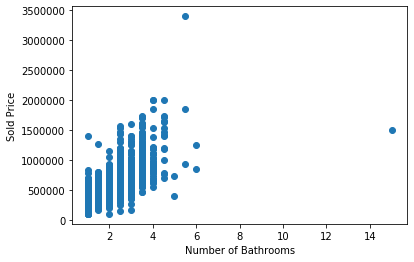

In [10]:
#Inspecting the data.  I can see there are outliers in price and number of bathrooms. 
bathrooms = sold_df['BATHS']
cost = sold_df['PRICE']
plt.scatter(bathrooms, cost)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sold Price")
plt.show()

In [11]:
#Changing the index to address. 
address_df = sold_df.set_index('ADDRESS')
address_df.head()

,SOLD DATE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE
ADDRESS,,,,,,,,,,,,,,,,,
8415 SE Schwind Cir,May-6-2020,Vancouver,98664,699999.0,1.0,1.0,Vancouver: The Heights (SW),100.0,15245.0,1960.0,106.0,7000.0,NaN,http://www.redfin.com/WA/Vancouver/8415-SE-Sch...,19308645.0,45.601924,-122.590982
5115 SE Henderson St,NaN,Portland,97206,190000.0,1.0,1.0,NaN,494.0,5000.0,1924.0,NaN,385.0,NaN,http://www.redfin.com/OR/Portland/5115-SE-Hend...,NaN,45.470002,-122.610603
7607 SE Harney St,April-15-2020,Portland,97206,229500.0,1.0,1.0,BRENTWOOD - DARLINGTON,504.0,5662.0,1949.0,127.0,455.0,NaN,http://www.redfin.com/OR/Portland/7607-SE-Harn...,19005138.0,45.463471,-122.585376
5404 NE Prescott St,NaN,Portland,97218,185000.0,1.0,1.0,NaN,512.0,5000.0,1944.0,NaN,361.0,NaN,http://www.redfin.com/OR/Portland/5404-NE-Pres...,NaN,45.555315,-122.607077
2969 SW Upper Dr,NaN,Portland,97201,265000.0,1.0,1.0,NaN,542.0,5000.0,1961.0,NaN,489.0,NaN,http://www.redfin.com/OR/Portland/2969-SW-Uppe...,NaN,45.506454,-122.708514


In [12]:
#Dropping the outliers. 2681 was expensive. 1906 was multifamily. 8415 had incorrect square footage.
filtered_df = address_df.drop(['2681 SW Buena Vista Dr', '1906 SE 72nd Ave', '8415 SE Schwind Cir'])
filtered_df.head()

,SOLD DATE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE
ADDRESS,,,,,,,,,,,,,,,,,
5115 SE Henderson St,NaN,Portland,97206,190000.0,1.0,1.0,NaN,494.0,5000.0,1924.0,NaN,385.0,NaN,http://www.redfin.com/OR/Portland/5115-SE-Hend...,NaN,45.470002,-122.610603
7607 SE Harney St,April-15-2020,Portland,97206,229500.0,1.0,1.0,BRENTWOOD - DARLINGTON,504.0,5662.0,1949.0,127.0,455.0,NaN,http://www.redfin.com/OR/Portland/7607-SE-Harn...,19005138.0,45.463471,-122.585376
5404 NE Prescott St,NaN,Portland,97218,185000.0,1.0,1.0,NaN,512.0,5000.0,1944.0,NaN,361.0,NaN,http://www.redfin.com/OR/Portland/5404-NE-Pres...,NaN,45.555315,-122.607077
2969 SW Upper Dr,NaN,Portland,97201,265000.0,1.0,1.0,NaN,542.0,5000.0,1961.0,NaN,489.0,NaN,http://www.redfin.com/OR/Portland/2969-SW-Uppe...,NaN,45.506454,-122.708514
3529 SE 61st Ave,NaN,Portland,97206,280000.0,1.0,1.0,NaN,560.0,5000.0,1950.0,NaN,500.0,NaN,http://www.redfin.com/OR/Portland/3529-SE-61st...,NaN,45.496941,-122.600645


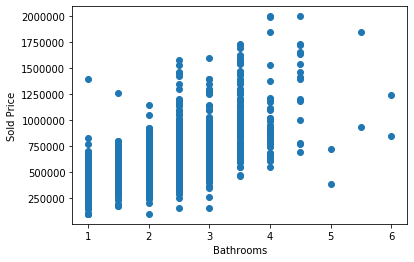

In [13]:
bathrooms = filtered_df['BATHS']
cost = filtered_df['PRICE']
plt.scatter(bathrooms, cost)
plt.xlabel("Bathrooms")
plt.ylabel("Sold Price")
plt.show()

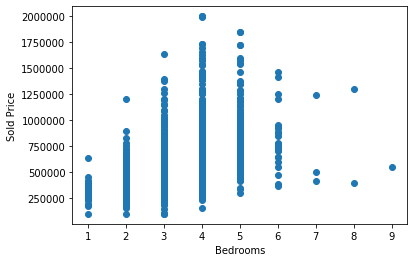

In [14]:
bedrooms = filtered_df['BEDS']
cost = filtered_df['PRICE']
plt.scatter(bedrooms, cost)
plt.xlabel("Bedrooms")
plt.ylabel("Sold Price")
plt.show()

In [164]:
filtered_df['BATHS_PER_BED'] = (filtered_df['BATHS']/filtered_df['BEDS'])
central_lat_calc = (45.5142-(filtered_df['LATITUDE']))
central_lon_calc = (-122.6779-(filtered_df['LONGITUDE']))
filtered_df['CENTRAL_LAT_CALC'] = central_lat_calc.abs()
filtered_df['CENTRAL_LON_CALC'] = central_lon_calc.abs()
filtered_df['CENTRALITY'] = (filtered_df['CENTRAL_LAT_CALC']+filtered_df['CENTRAL_LON_CALC']) 
filtered_df['YARD SIZE'] = (filtered_df['LOT SIZE']-filtered_df['SQUARE FEET'])
filtered_df.head(20)

/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,SOLD DATE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,...,MLS#,LATITUDE,LONGITUDE,baths_per_bed,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD_SIZE,YARD SIZE
ADDRESS,,,,,,,,,,,,,,,,,,,,,
5115 SE Henderson St,NaN,Portland,97206,190000.0,1.0,1.0,NaN,494.0,5000.0,1924.0,...,NaN,45.470002,-122.610603,1.0,1.0,0.044198,0.067297,0.111495,4506.0,4506.0
7607 SE Harney St,April-15-2020,Portland,97206,229500.0,1.0,1.0,BRENTWOOD - DARLINGTON,504.0,5662.0,1949.0,...,19005138.0,45.463471,-122.585376,1.0,1.0,0.050729,0.092524,0.143253,5158.0,5158.0
5404 NE Prescott St,NaN,Portland,97218,185000.0,1.0,1.0,NaN,512.0,5000.0,1944.0,...,NaN,45.555315,-122.607077,1.0,1.0,0.041115,0.070823,0.111938,4488.0,4488.0
2969 SW Upper Dr,NaN,Portland,97201,265000.0,1.0,1.0,NaN,542.0,5000.0,1961.0,...,NaN,45.506454,-122.708514,1.0,1.0,0.007746,0.030614,0.038360,4458.0,4458.0
3529 SE 61st Ave,NaN,Portland,97206,280000.0,1.0,1.0,NaN,560.0,5000.0,1950.0,...,NaN,45.496941,-122.600645,1.0,1.0,0.017259,0.077255,0.094515,4440.0,4440.0
1414 NE Going St,NaN,Portland,97211,345000.0,1.0,1.0,NaN,560.0,3750.0,1922.0,...,NaN,45.556184,-122.651314,1.0,1.0,0.041984,0.026586,0.068571,3190.0,3190.0
7220 NE 33rd Dr,June-12-2020,Portland,97211,265000.0,2.0,1.0,Portland Northeast,572.0,11761.0,1944.0,...,20089019.0,45.575460,-122.632957,0.5,0.5,0.061260,0.044943,0.106203,11189.0,11189.0
4846 N Vanderbilt St,NaN,Portland,97203,100000.0,NaN,1.0,NaN,576.0,3172.0,2017.0,...,NaN,45.581311,-122.718731,NaN,NaN,0.067111,0.040831,0.107942,2596.0,2596.0
6804 SE 77th Ave,May-27-2020,Portland,97206,250000.0,1.0,1.0,BRENTWOOD - DARLINGTON,577.0,5662.0,1927.0,...,20587240.0,45.473382,-122.583730,1.0,1.0,0.040818,0.094170,0.134988,5085.0,5085.0


In [ ]:
# filtered_df['BATHS_PER_BED'] = (filtered_df['BATHS']/filtered_df['BEDS'])
# central_lat_calc = ((filtered_df['LATITUDE'])-45.5142)
# central_lon_calc = (-122.6779-(filtered_df['LONGITUDE']))
# filtered_df['CENTRAL_LAT_CALC'] = central_lat_calc.abs()
# filtered_df['CENTRAL_LON_CALC'] = central_lon_calc.abs()
# filtered_df['CENTRALITY'] = (filtered_df['CENTRAL_LAT_CALC']+filtered_df['CENTRAL_LON_CALC'])                             
# filtered_df.head()

In [ ]:
#baths_per_bed = (filtered_df['BATHS']/filtered_df['BEDS'])
#baths_per_bed.describe()

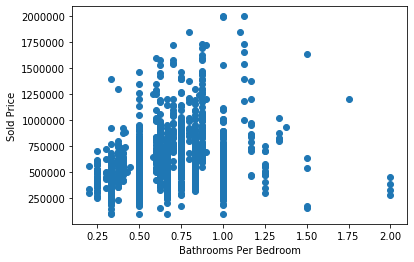

In [16]:
cost = filtered_df['PRICE']
plt.scatter(baths_per_bed, cost)
plt.xlabel("Bathrooms Per Bedroom")
plt.ylabel("Sold Price")
plt.show()

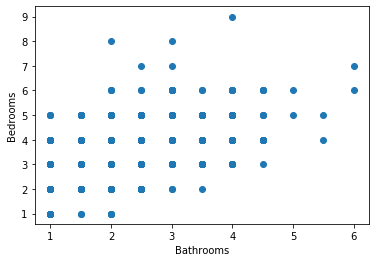

In [17]:
bathrooms = filtered_df['BATHS']
bedrooms = filtered_df['BEDS']
plt.scatter(bathrooms, bedrooms)
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.show()

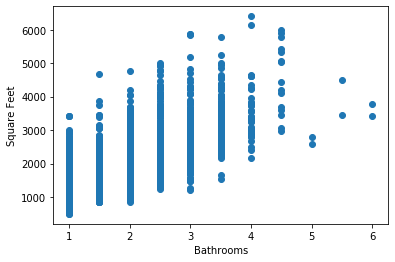

In [18]:
bathrooms = filtered_df['BATHS']
size = filtered_df['SQUARE FEET']
plt.scatter(bathrooms, size)
plt.xlabel("Bathrooms")
plt.ylabel("Square Feet")
plt.show()

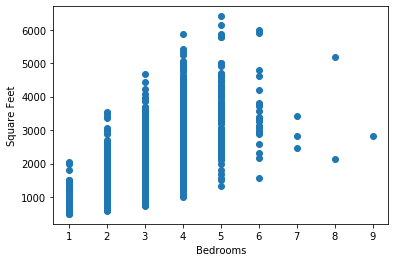

In [19]:
bedrooms = filtered_df['BEDS']
size = filtered_df['SQUARE FEET']
plt.scatter(bedrooms, size)
plt.xlabel("Bedrooms")
plt.ylabel("Square Feet")
plt.show()

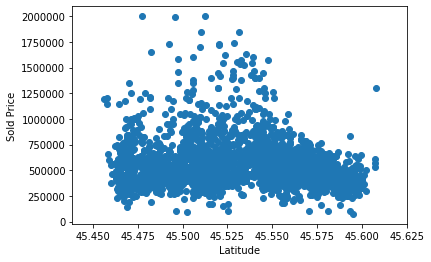

In [20]:
lat = filtered_df['LATITUDE']
cost = filtered_df['PRICE']
plt.scatter(lat, cost)
plt.xlabel("Latitude")
plt.ylabel("Sold Price")
plt.show()

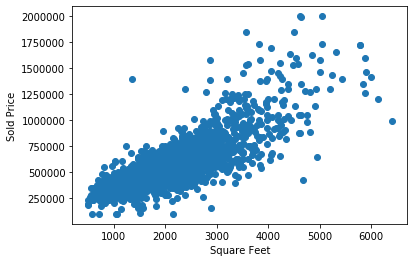

In [21]:
size = filtered_df['SQUARE FEET']
cost = filtered_df['PRICE']
plt.scatter(size, cost)
plt.xlabel("Square Feet")
plt.ylabel("Sold Price")
plt.show()

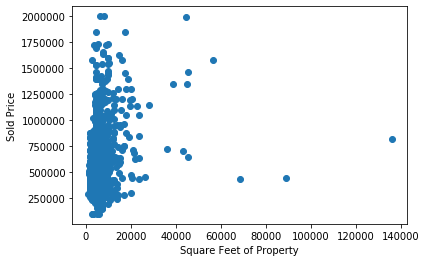

In [22]:
landsize = filtered_df['LOT SIZE']
cost = filtered_df['PRICE']
plt.scatter(landsize, cost)
plt.xlabel("Square Feet of Property")
plt.ylabel("Sold Price")
plt.show()

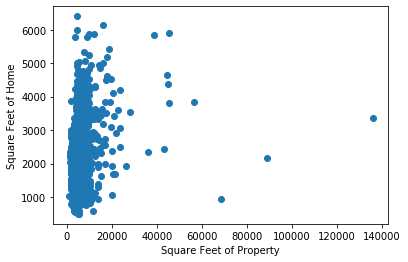

In [23]:
landsize = filtered_df['LOT SIZE']
size = filtered_df['SQUARE FEET']
plt.scatter(landsize, size)
plt.xlabel("Square Feet of Property")
plt.ylabel("Square Feet of Home")
plt.show()

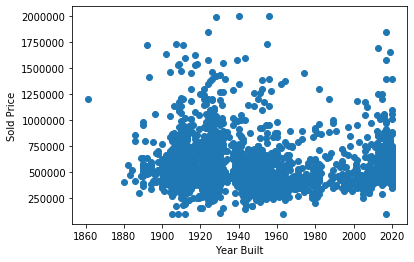

In [24]:
birthday = filtered_df['YEAR BUILT']
cost = filtered_df['PRICE']
plt.scatter(birthday, cost)
plt.xlabel("Year Built")
plt.ylabel("Sold Price")
plt.show()

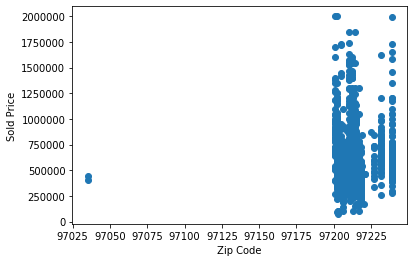

In [25]:
location = filtered_df['ZIP OR POSTAL CODE']
cost = filtered_df['PRICE']
plt.scatter(location, cost)
plt.xlabel("Zip Code")
plt.ylabel("Sold Price")
plt.show()

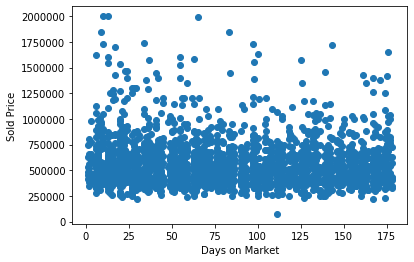

In [26]:
marketdays = filtered_df['DAYS ON MARKET']
cost = filtered_df['PRICE']
plt.scatter(marketdays, cost)
plt.xlabel("Days on Market")
plt.ylabel("Sold Price")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [166]:
selectVariables_df = filtered_df[["PRICE", "BATHS", "BEDS", "SQUARE FEET", "LOT SIZE", "YARD SIZE", "YEAR BUILT", "ZIP OR POSTAL CODE", "BATHS_PER_BED", "CENTRALITY", "CENTRAL_LAT_CALC", "CENTRAL_LON_CALC"]]
regression_df = selectVariables_df.dropna()

In [184]:
# data = x.copy()

# data_binary_encoded = pd.get_dummies(data, columns=["ZIP OR POSTAL CODE"])
# data_binary_encoded.head()

In [185]:
#x = regression_df[["BATHS", "SQUARE FEET", "YARD SIZE", "YEAR BUILT", "ZIP OR POSTAL CODE_97201", "ZIP OR POSTAL CODE_97202", "ZIP OR POSTAL CODE_97203", "ZIP OR POSTAL CODE_97210", "ZIP OR POSTAL CODE_97211", "ZIP OR POSTAL CODE_97216", "ZIP OR POSTAL CODE_97217", "ZIP OR POSTAL CODE_97218", "ZIP OR POSTAL CODE_97239"]]
x = regression_df[["BATHS", "SQUARE FEET", "YARD SIZE", "YEAR BUILT", "CENTRALITY"]]
y = regression_df[["PRICE"]]

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [170]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

In [171]:
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [173]:
model.fit(x_train_scaled, y_train_scaled)
training_score = model.score(x_train_scaled, y_train_scaled)
print(f"Training Score: {training_score}")

Training Score: 0.7212813614879319


In [174]:
testing_score = model.score(x_test_scaled, y_test_scaled)
print(f"Testing Score: {testing_score}")

Testing Score: 0.6548819038788628


In [175]:
reg_scaled = LinearRegression().fit(x_test_scaled, y_test_scaled)
reg_scaled.coef_

array([[ 0.17702066,  0.63017244,  0.01281948,  0.05526102, -0.15777217]])

In [176]:
reg_scaled.intercept_

array([0.01830584])

In [177]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.7212813614879318


In [178]:
testing_score = model.score(x_test, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.6548819038788625


In [181]:
reg = LinearRegression().fit(x_test, y_test)
reg.coef_

array([[ 4.91577934e+04,  1.67613884e+02,  7.83867054e-01,
         3.85194603e+02, -1.17820877e+06]])

In [180]:
reg.intercept_

array([-531109.923534])

In [141]:
bath_entry = 4
bed_entry = 4
square_feet_entry = 3200
lot_size_entry = 3500
year_built_entry = 1920
latitude_entry = 45.499533
longitude_entry = -122.675113

In [142]:
new_value =  5225994.17912154 + (bath_entry *(-4.95047667e+01)) + (bed_entry *(-1.40636142e+02)) + (square_feet_entry *(3.30270090e+02)) + (lot_size_entry *(-1.28472388e+01)) + (year_built_entry * (-2.66515365e+03)) + (latitude_entry * (-5.59071838e-01)) + (longitude_entry * (1.50063912e+00)) 
print(f"Based on the entered parameters, the home is worth the following: ${new_value}")

Based on the entered parameters, the home is worth the following: $1119828.0311055772
